<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter9DigitalImaging/Upscale_Images_with_Pretrained_super_image_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pretrained super image models
## David Brady
## University of Arizona
## Spring 2024

This notebook uses the code on github at https://github.com/eugenesiow/super-image to upscale images. Code below is directly from the github source with just images and model parameters changed. This notebook runs with a gpu and high ram.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})



# Upscale Images with Pre-trained `super-image` Models

---

[Github](https://github.com/eugenesiow/super-image) | All Models @ [huggingface.co](https://huggingface.co/models?filter=super-image)

---

Notebook to use the `super-image` library to quickly upscale and image.

The technique used is applying a pre-trained deep-learning model to restore a high resolution (HR) image from a single low resolution (LR) image. This is also called image super resolution.

The notebook is structured as follows:
* Setting up the Environment
* Using the Model (Running Inference)

## Setting up the Environment

#### Install the library

We will install the `super-image` library using `pip install`.

In [3]:
!pip install super-image
!pip install --upgrade huggingface_hub==0.25.0

## Using the Model (Running Inference)

Next we run a few lines of code to:

* `Image.open` and `requests.get` - Download an image from a URL (website) and store this as the `image` variable.
* `EdsrModel.from_pretrained` - Download and load a small, pre-trained deep-learning model to the `model` variable.
* `ImageLoader.load_image` - Load the image into the `model` using the `ImageLoader` helper.
* Use the model to run inference on the image (`inputs`).
* `ImageLoader.save_image` - Save the upscaled image output as a `.png` file using the `ImageLoader` helper.
* `ImageLoader.save_compare` - Save a `.png` that compares our upscaled image from the model with a baseline image using `Bicubic` upscaling.

In [4]:
from super_image import EdsrModel, ImageLoader
from PIL import Image
import requests
import cv2
from google.colab.patches import cv2_imshow

In [ ]:


#url = 'https://paperswithcode.com/media/datasets/Set5-0000002728-07a9793f_zA3bDjj.jpg'
#image = Image.open(requests.get(url, stream=True).raw)
url ='https://arizona.box.com/shared/static/c3486ia7smdxscd3aairb2sknd3a12lf'
!curl -L $url --output beads_RGB.bmp
image = Image.open('./beads_RGB.bmp')

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100     6    0     6    0     0      7      0 --:--:-- --:--:-- --:--:--  6000
100  768k  100  768k    0     0   705k      0  0:00:01  0:00:01 --:--:--  705k


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'url_to_filename' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` to benefit from the new cache layout.
  warnings.warn(warning_message, FutureWarning)


config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

pytorch_model_2x.pt:   0%|          | 0.00/5.51M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


/usr/local/lib/python3.11/dist-packages/super_image/modeling_utils.py:247: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(resolved_archive_file, map_l

View the comparison image to see, visually, how our model performed (on the right) against the baseline bicubic method (left).

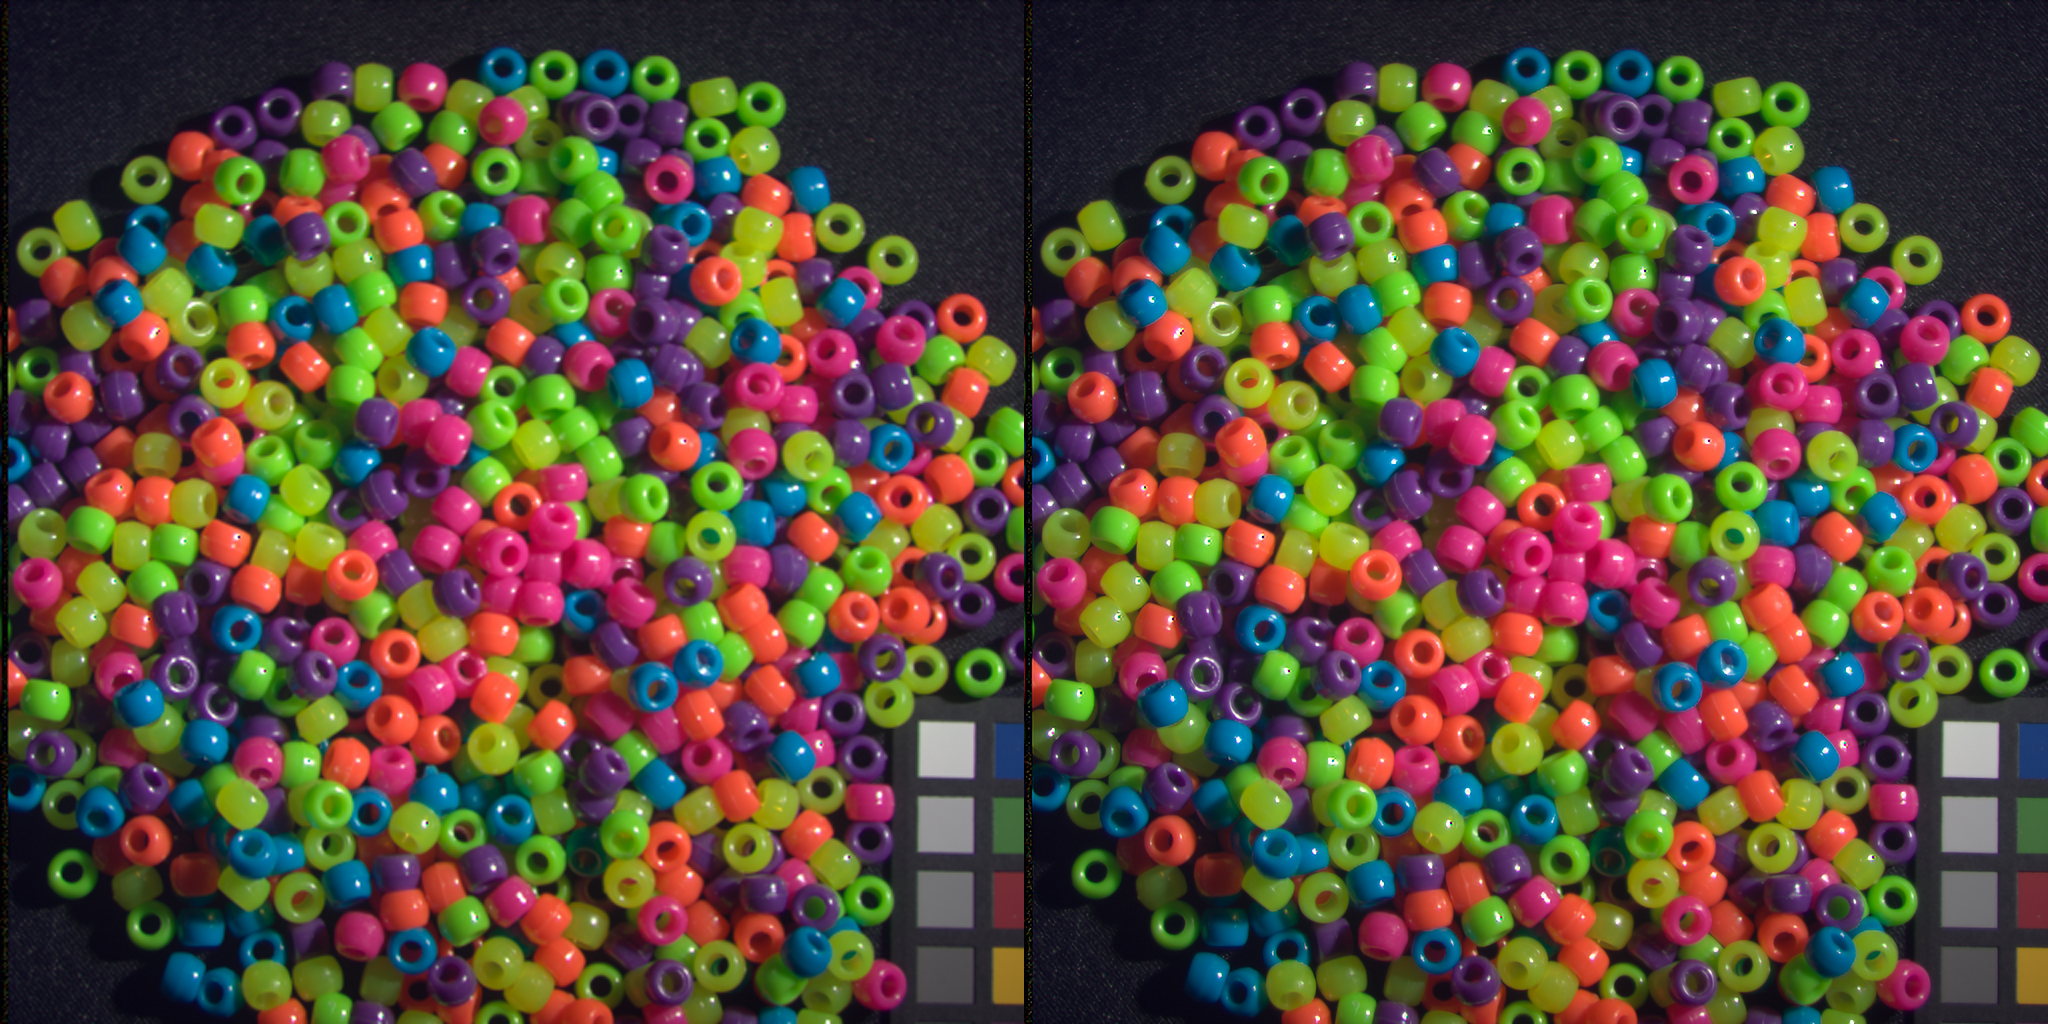

In [ ]:


img = cv2.imread('./scaled_2x_compare.png')
cv2_imshow(img)

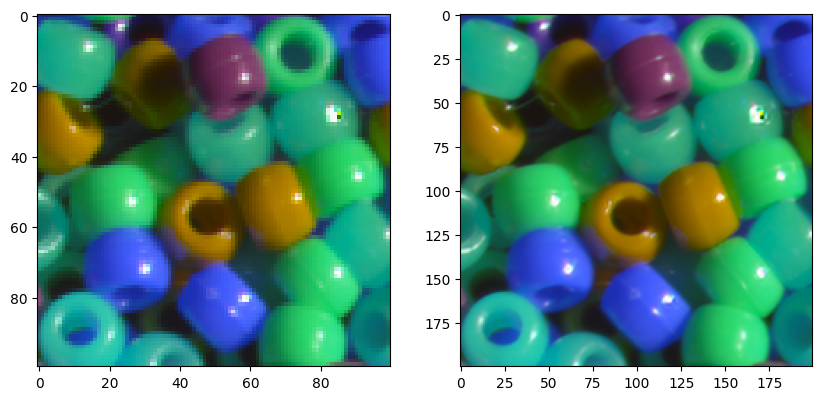

In [ ]:
plt.figure(figsize=(10,10))
pop=cv2.imread('./scaled_2x.png')
img=cv2.imread('./beads_RGB.bmp')
plt.subplot(1,2,1)
plt.imshow(img[100:200,100:200,:])
plt.subplot(1,2,2)
plt.imshow(pop[200:400,200:400,:])

## EDSR 4x upsampling

pytorch_model_4x.pt:   0%|          | 0.00/6.10M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_4x.pt


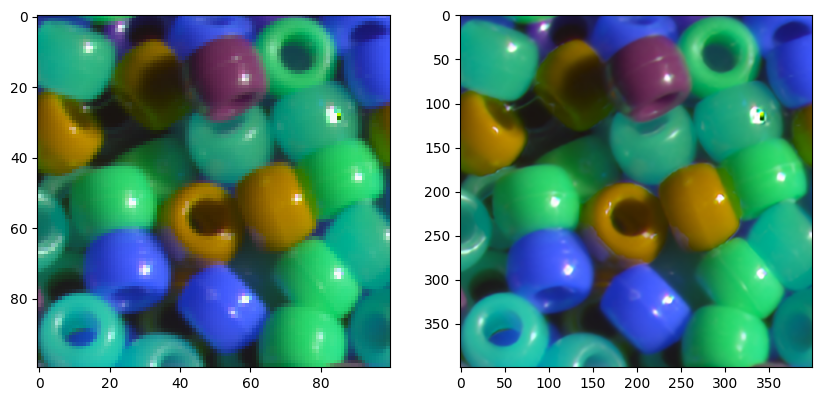

In [ ]:
image = Image.open('./beads_RGB.bmp')
model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=4)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_4x.png')
plt.figure(figsize=(10,10))
EDSR4x=cv2.imread('./scaled_4x.png')
img=cv2.imread('./beads_RGB.bmp')
plt.subplot(1,2,1)
plt.imshow(img[100:200,100:200,:])
plt.subplot(1,2,2)
plt.imshow(EDSR4x[400:800,400:800,:])


## MSRN 4x

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'url_to_filename' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` to benefit from the new cache layout.
  warnings.warn(warning_message, FutureWarning)
/usr/local/lib/python3.11/dist-packages/super_image/modeling_utils.py:247: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default v

https://huggingface.co/eugenesiow/mdsr/resolve/main/pytorch_model_4x.pt


Text(0.5, 1.0, 'EDSR')

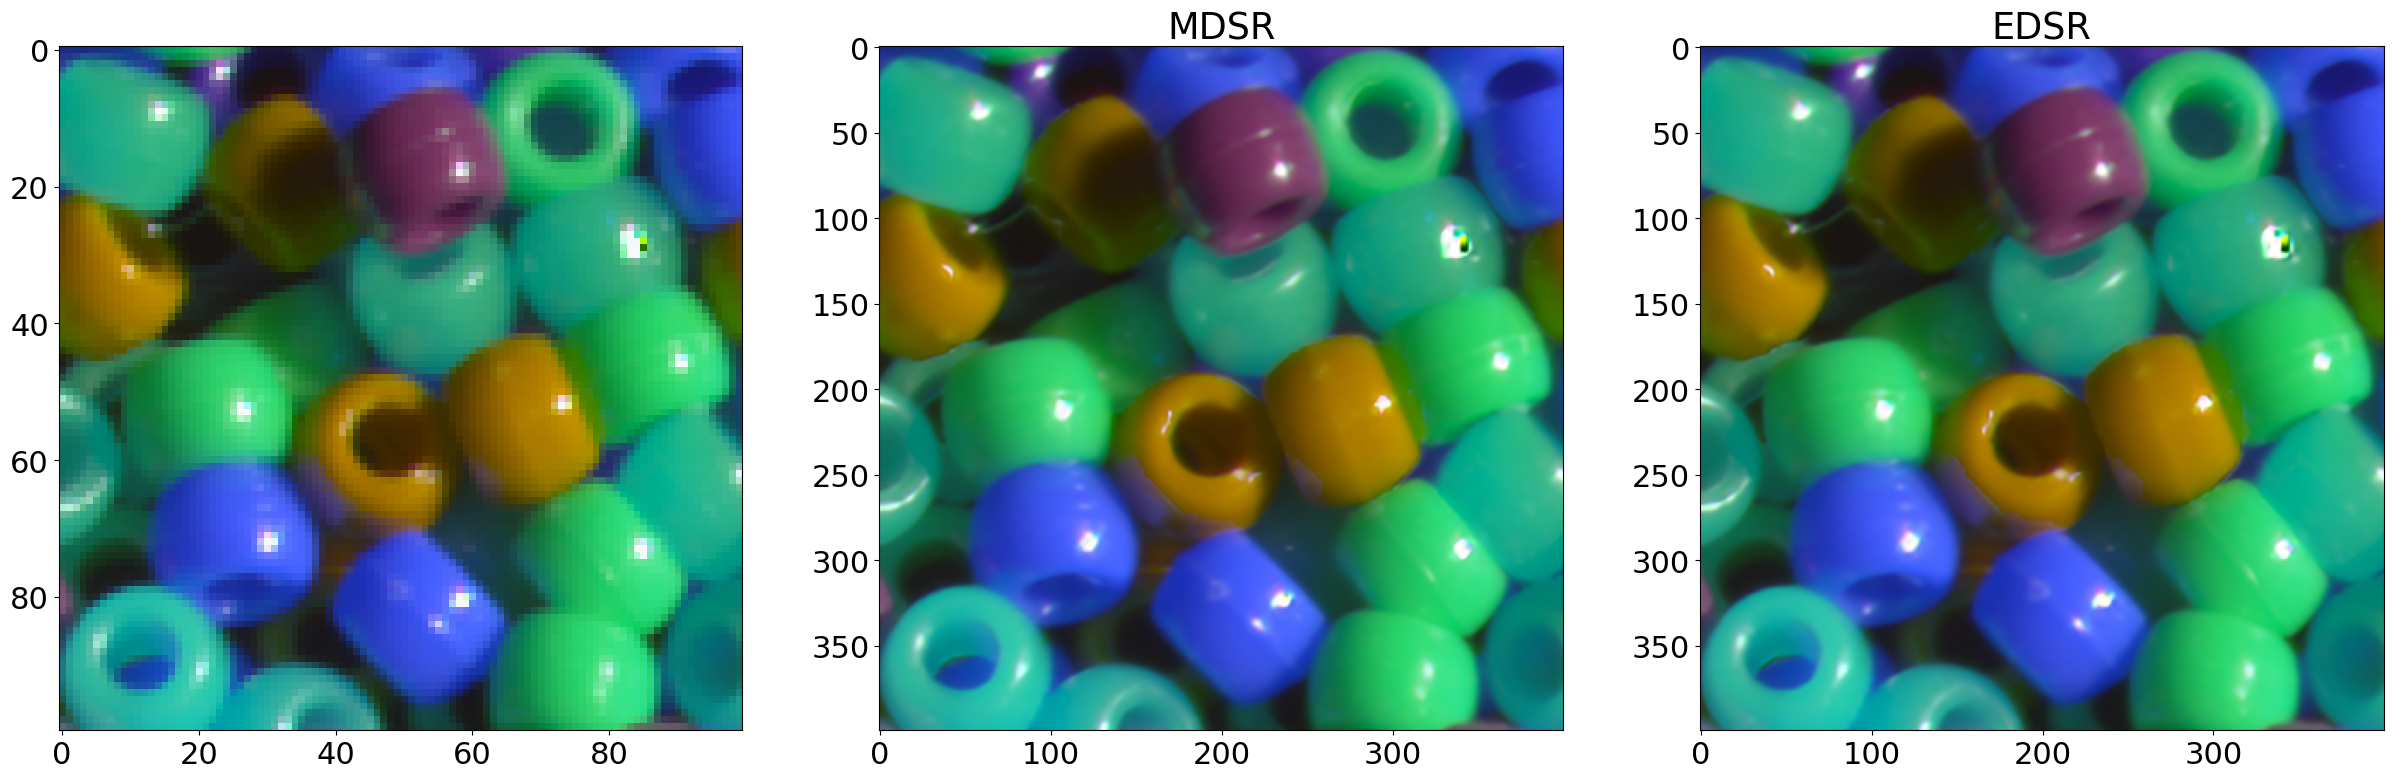

In [ ]:
from super_image import MdsrModel
model = MdsrModel.from_pretrained('eugenesiow/mdsr', scale=4)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_4x.png')
plt.figure(figsize=(30,10))
pop=cv2.imread('./scaled_4x.png')
img=cv2.imread('./beads_RGB.bmp')
plt.subplot(1,3,1)
plt.imshow(img[100:200,100:200,:])
plt.subplot(1,3,2)
plt.imshow(pop[400:800,400:800,:])
plt.title('MDSR')
plt.subplot(1,3,3)
plt.imshow(EDSR4x[400:800,400:800,:])
plt.title('EDSR')


## Catus Cat

In [13]:
url ='https://arizona.box.com/shared/static/1x9cvbm6c8s3fj637hr2dmtr820ewtku'
!curl -L $url --output cactusCat.png
image = Image.open('./cactusCat.png')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100     6    0     6    0     0      2      0 --:--:--  0:00:02 --:--:--  6000
100  455k  100  455k    0     0   123k      0  0:00:03  0:00:03 --:--:--  758k


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'url_to_filename' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` to benefit from the new cache layout.
  warnings.warn(warning_message, FutureWarning)


https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_4x.pt


/usr/local/lib/python3.11/dist-packages/super_image/modeling_utils.py:247: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(resolved_archive_file, map_l

https://huggingface.co/eugenesiow/mdsr/resolve/main/pytorch_model_4x.pt


Text(0.5, 1.0, 'EDSR')

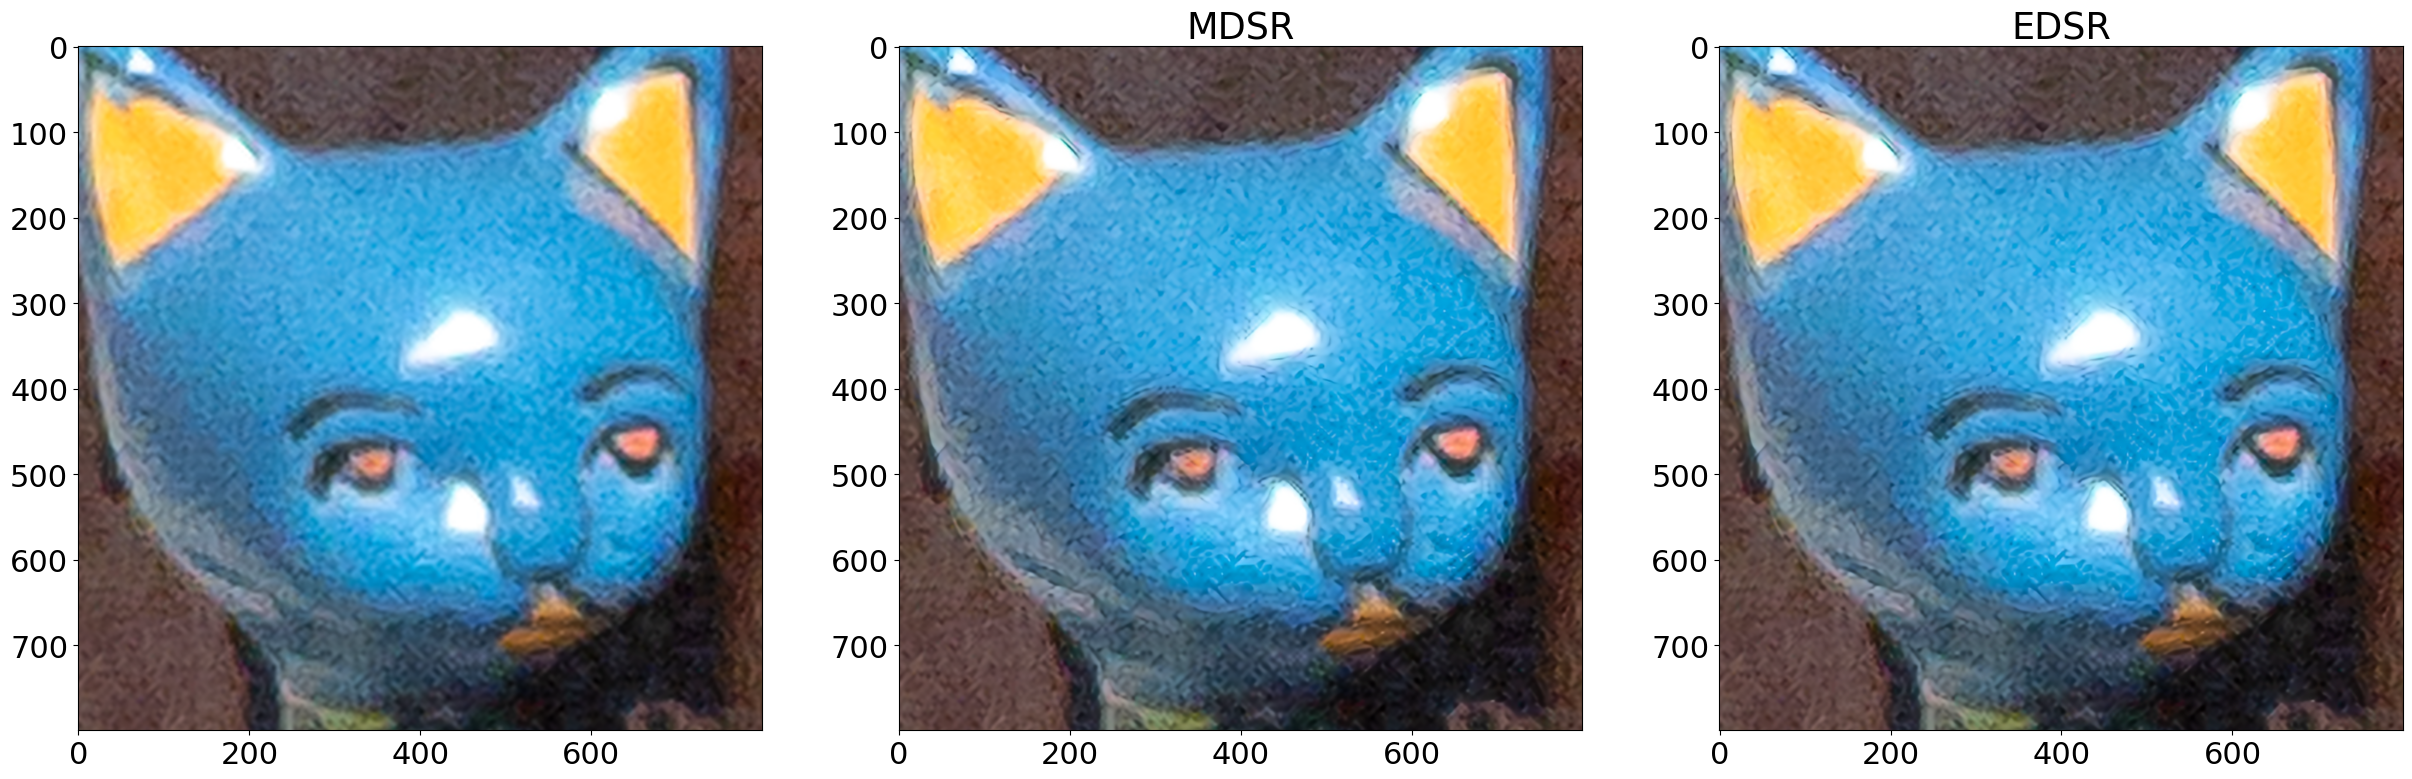

In [19]:
model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=4)
inputs = ImageLoader.load_image(image)
pip = model(inputs)
ImageLoader.save_image(pip, './EDSRscaled_4x.png')
from super_image import MdsrModel
model = MdsrModel.from_pretrained('eugenesiow/mdsr', scale=4)
pop = model(inputs)
ImageLoader.save_image(pop, './MDSRscaled_4x.png')
img=cv2.imread('./cactusCat.png')
img=cv2.resize(img,(4*510,4*511),interpolation = cv2.INTER_LANCZOS4)
cv2.imwrite('./Lanczos4scaled_4x.png',img)
pop=cv2.imread('./MDSRscaled_4x.png')
pop=cv2.cvtColor(pop,cv2.COLOR_BGR2RGB)
pip=cv2.imread('./EDSRscaled_4x.png')
pip=cv2.cvtColor(pip,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(img[200:1000,200:1000,:])
plt.subplot(1,3,2)
plt.imshow(pop[200:1000,200:1000,:])
plt.title('MDSR')
plt.subplot(1,3,3)
plt.imshow(pip[200:1000,200:1000,:])
plt.title('EDSR')